# Electoral Bond Report
**Disclaimer:** My intention isn't to expose any political parties or individual company reputations!! It's fact and already exposed by variouse main stream media.

**Purpose:** My purpose to create this report is that to use real raw data data, clean it and get insights about data.

**Resource:**

[Data](https://www.eci.gov.in/disclosure-of-electoral-bonds) is taken from Election Commision of India(ECI) portal's. As I have downloaded on data 2024/04/06.

**Summary obsevation**:

According to above data which is available on [ECI portal](https://www.eci.gov.in/disclosure-of-electoral-bonds). Electoral Bond was available to purchase on date from 2016/04/12 to 2024/01/11 and encashedment on date from 2019/04/16 to 2024/01/24. And total number of bond purchased by companies are 18871 and encashed by political parties 18741. There is difference of 30 bonds so these bonds might be goes for PM care funds or return by to companies after declaring unconstitutional by CJI of suprime court of India.

There's five types of bond was avialable to purchase, who want to done to the political parties. There're  `1,00,00,000`, `10,00,000`, `1,00,000`, `10,000`, and `1,000`.
The maximum worth of bond purchased by **FUTURE GAMING AND HOTEL SERVICES PR**  of `1208.0` Crores. The maximum encashed by **BHARATIYA JANATA PARTY** of worth `6060.5111` Crores.





In [1]:
import findspark
findspark.init()

In [2]:
import tabula
import jpype
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [3]:
spark = SparkSession.builder \
    .appName("EB-Analytics") \
    .getOrCreate()

24/04/13 18:53:19 WARN Utils: Your hostname, localhost resolves to a loopback address: 127.0.0.1; using 192.168.1.107 instead (on interface wlp1s0)
24/04/13 18:53:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/13 18:53:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
def extract_pdf_tabular_data(pdf_file_path):

    tables = tabula.read_pdf(pdf_file_path, pages='all', pandas_options={'header': 0})
    
    data_list = []
    for df in tables:
        data_list.extend(df.to_dict(orient='records'))
    
    return data_list

In [5]:
def renamed_cols(old_cols, new_cols, df):
    for old_col, new_col in zip(old_cols, new_cols):
        df = df.withColumnRenamed(old_col, new_col)
    return df
        

# Electoral Bond Purchase Details
Read Electoral Bond Purchase details.

In [6]:
eb_purchase_file_path = 'datasets/EB_Purchase_Details.pdf'


eb_purchase_data = extract_pdf_tabular_data(eb_purchase_file_path)

eb_purchase_df = spark.createDataFrame(eb_purchase_data)

eb_purchase_df.show(truncate=False)

+------------+-----------------+--------------+-------------+-----------------+------------+------------+----------------------------------------------+------+-----------------------+------+------+
|Bond\rNumber|Date of\rPurchase|Date of Expiry|Denominations|Issue Branch Code|Issue Teller|Journal Date|Name of the Purchaser                         |Prefix|Reference No  (URN)    |Sr No.|Status|
+------------+-----------------+--------------+-------------+-----------------+------------+------------+----------------------------------------------+------+-----------------------+------+------+
|11448       |12/Apr/2019      |26/Apr/2019   |10,00,000    |1                |5899230     |12/Apr/2019 |A B C INDIA LIMITED                           |TL    |00001201904120000001166|1     |Paid  |
|11447       |12/Apr/2019      |26/Apr/2019   |10,00,000    |1                |5899230     |12/Apr/2019 |A B C INDIA LIMITED                           |TL    |00001201904120000001166|2     |Paid  |
|11441    

In [7]:
eb_purchase_df.columns

['Bond\rNumber',
 'Date of\rPurchase',
 'Date of Expiry',
 'Denominations',
 'Issue Branch Code',
 'Issue Teller',
 'Journal Date',
 'Name of the Purchaser',
 'Prefix',
 'Reference No  (URN)',
 'Sr No.',
 'Status']

In [8]:
old_cols = eb_purchase_df.columns
new_cols = [c.replace("\r", "_").replace(" ", "_") for c in eb_purchase_df.columns]
eb_purchase_df = renamed_cols(old_cols, new_cols, eb_purchase_df)

In [9]:
eb_purchase_df.columns

['Bond_Number',
 'Date_of_Purchase',
 'Date_of_Expiry',
 'Denominations',
 'Issue_Branch_Code',
 'Issue_Teller',
 'Journal_Date',
 'Name_of_the_Purchaser',
 'Prefix',
 'Reference_No__(URN)',
 'Sr_No.',
 'Status']

In [10]:
eb_purchase_df.show(truncate=False)

+-----------+----------------+--------------+-------------+-----------------+------------+------------+----------------------------------------------+------+-----------------------+------+------+
|Bond_Number|Date_of_Purchase|Date_of_Expiry|Denominations|Issue_Branch_Code|Issue_Teller|Journal_Date|Name_of_the_Purchaser                         |Prefix|Reference_No__(URN)    |Sr_No.|Status|
+-----------+----------------+--------------+-------------+-----------------+------------+------------+----------------------------------------------+------+-----------------------+------+------+
|11448      |12/Apr/2019     |26/Apr/2019   |10,00,000    |1                |5899230     |12/Apr/2019 |A B C INDIA LIMITED                           |TL    |00001201904120000001166|1     |Paid  |
|11447      |12/Apr/2019     |26/Apr/2019   |10,00,000    |1                |5899230     |12/Apr/2019 |A B C INDIA LIMITED                           |TL    |00001201904120000001166|2     |Paid  |
|11441      |12/Apr/

In [11]:
eb_purchase_df = eb_purchase_df.withColumnRenamed("Denominations", "Denominations_pur")\
                                .withColumnRenamed("Bond_Number", "Bond_Number_pur")\
                                .withColumnRenamed("prefix", "prefix_pur")\
                                .withColumnRenamed("Reference_No__(URN)", "Ref_URN")
eb_purchase_df.columns

['Bond_Number_pur',
 'Date_of_Purchase',
 'Date_of_Expiry',
 'Denominations_pur',
 'Issue_Branch_Code',
 'Issue_Teller',
 'Journal_Date',
 'Name_of_the_Purchaser',
 'prefix_pur',
 'Ref_URN',
 'Sr_No.',
 'Status']

If you want convert pdf file into excel and use excel to analysis just uncomment below cell and define your excel
file path, where you want to save.

In [12]:
#pandas_df.to_excel(output_excel_path, index=False)

In [15]:
req_cols = ["Bond_Number_pur",
            "Prefix_pur",
            "Name_of_the_Purchaser",
            "Denominations_pur",
            "Date_of_Purchase",
            "Date_of_Expiry",
            "Ref_URN"]
eb_purchase_df_req = eb_purchase_df.select(req_cols)
eb_purchase_df_req.show(truncate=True)

+---------------+----------+---------------------+-----------------+----------------+--------------+--------------------+
|Bond_Number_pur|Prefix_pur|Name_of_the_Purchaser|Denominations_pur|Date_of_Purchase|Date_of_Expiry|             Ref_URN|
+---------------+----------+---------------------+-----------------+----------------+--------------+--------------------+
|          11448|        TL|  A B C INDIA LIMITED|        10,00,000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|          11447|        TL|  A B C INDIA LIMITED|        10,00,000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|          11441|        TL|  A B C INDIA LIMITED|        10,00,000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|           1113|        OL|  A B C INDIA LIMITED|         1,00,000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|           1118|        OL|  A B C INDIA LIMITED|         1,00,000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|           1112|       

**Note:** In this cell, I want see the a single purchase deatils but only bond number isn't uquie to identify the purchase details. So, here Bond Number and along with prefix of purchaser. 

In [16]:
eb_purchase_df.filter(F.col("Bond_Number_pur")=="11448").show(truncate=False)

+---------------+----------------+--------------+-----------------+-----------------+------------+------------+---------------------------+----------+-----------------------+------+------+
|Bond_Number_pur|Date_of_Purchase|Date_of_Expiry|Denominations_pur|Issue_Branch_Code|Issue_Teller|Journal_Date|Name_of_the_Purchaser      |prefix_pur|Ref_URN                |Sr_No.|Status|
+---------------+----------------+--------------+-----------------+-----------------+------------+------------+---------------------------+----------+-----------------------+------+------+
|11448          |12/Apr/2019     |26/Apr/2019   |10,00,000        |1                |5899230     |12/Apr/2019 |A B C INDIA LIMITED        |TL        |00001201904120000001166|1     |Paid  |
|11448          |15/Nov/2022     |29/Nov/2022   |1,00,00,000      |1                |5054982     |15/Nov/2022 |IFB AGRO INDUSTRIES LIMITED|OC        |00001202211150000002706|11034 |Paid  |
+---------------+----------------+--------------+------

**The individual details of purchaser**

In [17]:
# 10044 TL
# 17845 OC
eb_purchase_df_req.where((F.col("Bond_Number_pur")=="10044") & (F.col("Prefix_pur")=="TL")).show(truncate=False)

+---------------+----------+-----------------------------------+-----------------+----------------+--------------+-----------------------+
|Bond_Number_pur|Prefix_pur|Name_of_the_Purchaser              |Denominations_pur|Date_of_Purchase|Date_of_Expiry|Ref_URN                |
+---------------+----------+-----------------------------------+-----------------+----------------+--------------+-----------------------+
|10044          |TL        |PACIFICA DEVELOPERS P LTD REFLECTIO|10,00,000        |11/Jan/2024     |25/Jan/2024   |01355202401110000003741|
+---------------+----------+-----------------------------------+-----------------+----------------+--------------+-----------------------+



In [18]:
# 10044 TL
# 17845 OC
eb_purchase_df_req.where((F.col("Bond_Number_pur")=="17845") & (F.col("Prefix_pur")=="OC")).show(truncate=False)

+---------------+----------+---------------------+-----------------+----------------+--------------+-----------------------+
|Bond_Number_pur|Prefix_pur|Name_of_the_Purchaser|Denominations_pur|Date_of_Purchase|Date_of_Expiry|Ref_URN                |
+---------------+----------+---------------------+-----------------+----------------+--------------+-----------------------+
|17845          |OC        |RUNGTA SONS P LTD    |1,00,00,000      |11/Jan/2024     |25/Jan/2024   |00001202401110000003735|
+---------------+----------+---------------------+-----------------+----------------+--------------+-----------------------+



**Electoral Bond types**

There're five types of Bonds

In [19]:
eb_purchase_df_req.select("Denominations_pur").distinct().show()

+-----------------+
|Denominations_pur|
+-----------------+
|      1,00,00,000|
|           10,000|
|            1,000|
|         1,00,000|
|        10,00,000|
+-----------------+



In [20]:
eb_purchase_df_req = eb_purchase_df_req.withColumn("Denominations_pur", F.regexp_replace(F.col("Denominations_pur"), ",", "").cast('int'))
eb_purchase_df_req.show()

+---------------+----------+---------------------+-----------------+----------------+--------------+--------------------+
|Bond_Number_pur|Prefix_pur|Name_of_the_Purchaser|Denominations_pur|Date_of_Purchase|Date_of_Expiry|             Ref_URN|
+---------------+----------+---------------------+-----------------+----------------+--------------+--------------------+
|          11448|        TL|  A B C INDIA LIMITED|          1000000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|          11447|        TL|  A B C INDIA LIMITED|          1000000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|          11441|        TL|  A B C INDIA LIMITED|          1000000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|           1113|        OL|  A B C INDIA LIMITED|           100000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|           1118|        OL|  A B C INDIA LIMITED|           100000|     12/Apr/2019|   26/Apr/2019|00001201904120000...|
|           1112|       

## The toal worth of bond puchase by each company in crores

In [22]:
total_bond_worth_bought_by_comp = eb_purchase_df_req.groupBy("Name_of_the_Purchaser")\
                    .agg((F.sum(F.col("Denominations_pur")/10**7)).alias("total_bond_worth_purchase_by_Company_in_crores"))\
                    .orderBy(F.col("total_bond_worth_purchase_by_Company_in_crores").desc())

total_bond_worth_bought_by_comp.show(truncate=False)

+----------------------------------------------+----------------------------------------------+
|Name_of_the_Purchaser                         |total_bond_worth_purchase_by_Company_in_crores|
+----------------------------------------------+----------------------------------------------+
|FUTURE GAMING AND HOTEL SERVICES PR           |1208.0                                        |
|MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED|821.0                                         |
|QWIKSUPPLYCHAINPRIVATELIMITED                 |410.0                                         |
|HALDIA ENERGY LIMITED                         |377.0                                         |
|VEDANTA LIMITED                               |375.65                                        |
|ESSEL MINING AND INDS LTD                     |224.5                                         |
|WESTERN UP POWER TRANSMISSION COMPANY LI MITED|220.0                                         |
|KEVENTER FOODPARK INFRA LIMITED        

## Graphcal representation
**The total worth of bond purchase by top 20 companies**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

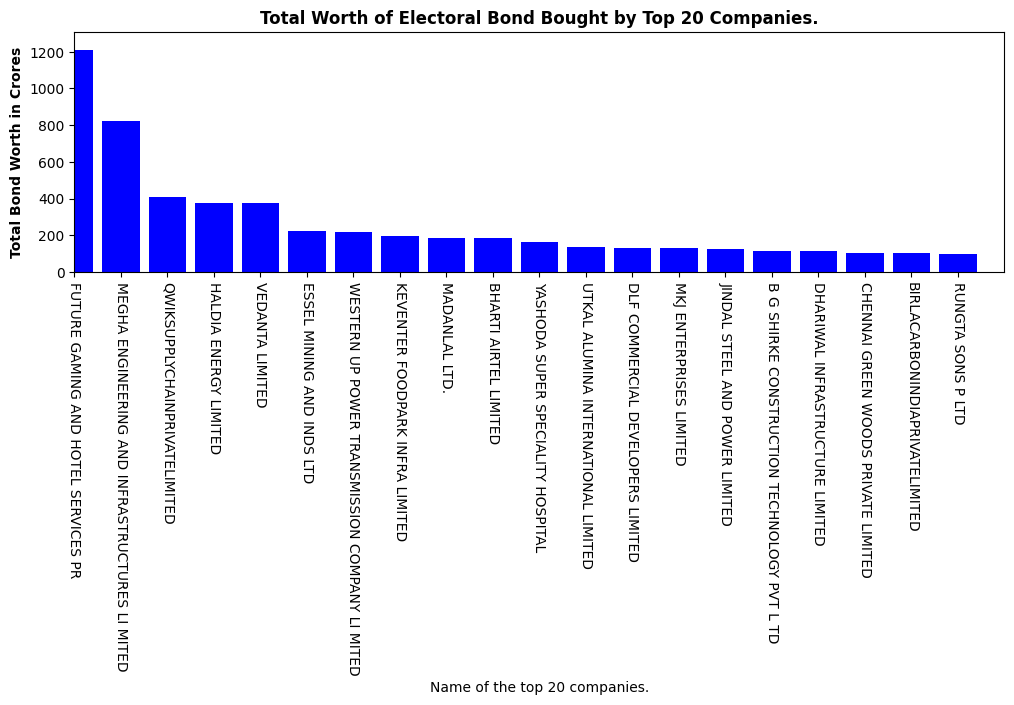

In [71]:
pandas_df = total_bond_worth_bought_by_comp.limit(20).toPandas()

plt.figure(figsize=(12, 5))
plt.title("Total Worth of Electoral Bond Bought by Top 20 Companies.", fontweight='bold')
plt.bar(pandas_df["Name_of_the_Purchaser"],pandas_df["total_bond_worth_purchase_by_Company_in_crores"], color='blue' )
plt.ylabel("Total Bond Worth in Crores", fontweight='bold')
plt.xlabel("Name of the top 20 companies.")
plt.xlim(0, len(pandas_df["Name_of_the_Purchaser"])) 
plt.ylim(0, max(pandas_df["total_bond_worth_purchase_by_Company_in_crores"])+100)
plt.xticks(rotation=-90)
plt.subplots_adjust(bottom=.4) 
plt.savefig("images/Total_Worth_of_Electoral_Bond_Bought_by_Top_20_Companies.png")
plt.show()

In [ ]:
# eb_purchase_pands_df = eb_purchase_df.toPandas()
# eb_purchase_pands_df.to_excel("datasets/EB_Purchase_Details.xlsx", index=False)

# Electoral Bond Redemtion/Buyer Details

In [26]:
eb_redemption_file_path = 'datasets/EB_Redemption_Details.pdf'


eb_redemption_data = extract_pdf_tabular_data(eb_redemption_file_path)

eb_redemption_df = spark.createDataFrame(eb_redemption_data)

eb_redemption_df.show(truncate=False)

+-------------------------------+------------+-------------------+-------------+----------------------------------------+----------------+----------+------+------+
|Account no. of\rPolitical Party|Bond\rNumber|Date of\rEncashment|Denominations|Name of the Political Party             |Pay Branch\rCode|Pay Teller|Prefix|Sr No.|
+-------------------------------+------------+-------------------+-------------+----------------------------------------+----------------+----------+------+------+
|*******5199                    |775         |12/Apr/2019        |1,00,00,000  |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800             |2770121   |OC    |1     |
|*******5199                    |3975        |12/Apr/2019        |1,00,00,000  |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800             |2770121   |OC    |2     |
|*******5199                    |3967        |12/Apr/2019        |1,00,00,000  |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800             |2770121   |OC    |3     |
|*******5199    

In [27]:
eb_redemption_df.columns

['Account no. of\rPolitical Party',
 'Bond\rNumber',
 'Date of\rEncashment',
 'Denominations',
 'Name of the Political Party',
 'Pay Branch\rCode',
 'Pay Teller',
 'Prefix',
 'Sr No.']

In [28]:
old_cols = eb_redemption_df.columns
new_cols = [c.replace("\r", "_").replace(" ", "_") for c in eb_redemption_df.columns]
eb_redemption_df = renamed_cols(old_cols, new_cols, eb_redemption_df)

In [29]:
eb_redemption_df.columns

['Account_no._of_Political_Party',
 'Bond_Number',
 'Date_of_Encashment',
 'Denominations',
 'Name_of_the_Political_Party',
 'Pay_Branch_Code',
 'Pay_Teller',
 'Prefix',
 'Sr_No.']

In [30]:
eb_redemption_df.show(truncate=False)

+------------------------------+-----------+------------------+-------------+----------------------------------------+---------------+----------+------+------+
|Account_no._of_Political_Party|Bond_Number|Date_of_Encashment|Denominations|Name_of_the_Political_Party             |Pay_Branch_Code|Pay_Teller|Prefix|Sr_No.|
+------------------------------+-----------+------------------+-------------+----------------------------------------+---------------+----------+------+------+
|*******5199                   |775        |12/Apr/2019       |1,00,00,000  |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |2770121   |OC    |1     |
|*******5199                   |3975       |12/Apr/2019       |1,00,00,000  |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |2770121   |OC    |2     |
|*******5199                   |3967       |12/Apr/2019       |1,00,00,000  |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |2770121   |OC    |3     |
|*******5199                   |10418   

In [ ]:
# eb_redemption_pands_df = eb_redemption_df.toPandas()
# eb_redemption_pands_df.to_excel("datasets/EB_Redemption_Details.xlsx", index=False)

## Individual details of polical party

**In the below the specific Bond Number (10044) there is no records, that mean the bond purchased by company but not encashed by political party**

In [31]:
# 10044 TL
# 17845 OC
eb_redemption_df.filter((F.col("Bond_Number")=="17845") & (F.col("Prefix")=="OC")).show()

+------------------------------+-----------+------------------+-------------+---------------------------+---------------+----------+------+------+
|Account_no._of_Political_Party|Bond_Number|Date_of_Encashment|Denominations|Name_of_the_Political_Party|Pay_Branch_Code|Pay_Teller|Prefix|Sr_No.|
+------------------------------+-----------+------------------+-------------+---------------------------+---------------+----------+------+------+
|                   *******8244|      17845|       19/Jan/2024|  1,00,00,000|       BHARATIYA JANATA ...|            691|   7516991|    OC| 20327|
+------------------------------+-----------+------------------+-------------+---------------------------+---------------+----------+------+------+



In [32]:
# 10044 TL
# 17845 OC
eb_redemption_df.filter((F.col("Bond_Number")=="10044") & (F.col("Prefix")=="TL")).show()

+------------------------------+-----------+------------------+-------------+---------------------------+---------------+----------+------+------+
|Account_no._of_Political_Party|Bond_Number|Date_of_Encashment|Denominations|Name_of_the_Political_Party|Pay_Branch_Code|Pay_Teller|Prefix|Sr_No.|
+------------------------------+-----------+------------------+-------------+---------------------------+---------------+----------+------+------+
+------------------------------+-----------+------------------+-------------+---------------------------+---------------+----------+------+------+



In [34]:
eb_redemption_df = eb_redemption_df.withColumnRenamed("Denominations","Denominations_By_PP")\
                                    .withColumnRenamed("prefix", "prefix_Buyer_Bond") \
                                    .withColumnRenamed("Bond_Number", "Bond_Number_Buyer")
eb_redemption_df.columns

['Account_no._of_Political_Party',
 'Bond_Number_Buyer',
 'Date_of_Encashment',
 'Denominations_By_PP',
 'Name_of_the_Political_Party',
 'Pay_Branch_Code',
 'Pay_Teller',
 'prefix_Buyer_Bond',
 'Sr_No.']

In [35]:
req_col = ['Bond_Number_Buyer',
           'Prefix_Buyer_Bond',
           'Date_of_Encashment',
           'Denominations_By_PP',
         'Name_of_the_Political_Party',
         'Pay_Branch_Code']

eb_redemption_df_req = eb_redemption_df.select(req_col)
eb_redemption_df_req.show(truncate=False)

+-----------------+-----------------+------------------+-------------------+----------------------------------------+---------------+
|Bond_Number_Buyer|Prefix_Buyer_Bond|Date_of_Encashment|Denominations_By_PP|Name_of_the_Political_Party             |Pay_Branch_Code|
+-----------------+-----------------+------------------+-------------------+----------------------------------------+---------------+
|775              |OC               |12/Apr/2019       |1,00,00,000        |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|3975             |OC               |12/Apr/2019       |1,00,00,000        |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|3967             |OC               |12/Apr/2019       |1,00,00,000        |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|10418            |TL               |12/Apr/2019       |10,00,000          |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|126              |TL               |12/Apr/2019       |10,00,

In [36]:
eb_redemption_df_req = eb_redemption_df_req.withColumn("Denominations_By_PP", F.regexp_replace(F.col("Denominations_By_PP"), ",", "").cast('int'))
eb_redemption_df_req.show(truncate=False)

+-----------------+-----------------+------------------+-------------------+----------------------------------------+---------------+
|Bond_Number_Buyer|Prefix_Buyer_Bond|Date_of_Encashment|Denominations_By_PP|Name_of_the_Political_Party             |Pay_Branch_Code|
+-----------------+-----------------+------------------+-------------------+----------------------------------------+---------------+
|775              |OC               |12/Apr/2019       |10000000           |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|3975             |OC               |12/Apr/2019       |10000000           |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|3967             |OC               |12/Apr/2019       |10000000           |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|10418            |TL               |12/Apr/2019       |1000000            |ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM|800            |
|126              |TL               |12/Apr/2019       |100000

## Total encashment by each Political Party

In [38]:
Total_encashment_political_party = eb_redemption_df_req.groupBy("Name_of_the_Political_Party")\
                    .agg((F.sum(F.col("Denominations_By_PP"))/10**7).alias("encashement_by_pp_in_crores"))\
                    .orderBy(F.col("encashement_by_pp_in_crores").desc())
Total_encashment_political_party.show(truncate=False)

+------------------------------------------------------------+---------------------------+
|Name_of_the_Political_Party                                 |encashement_by_pp_in_crores|
+------------------------------------------------------------+---------------------------+
|BHARATIYA JANATA PARTY                                      |6060.5111                  |
|ALL INDIA TRINAMOOL CONGRESS                                |1609.5314                  |
|PRESIDENT, ALL INDIA CONGRESS COMMITTEE                     |1421.8655                  |
|BHARAT RASHTRA SAMITHI                                      |1214.7099                  |
|BIJU JANATA DAL                                             |775.5                      |
|DRAVIDA MUNNETRA KAZHAGAM (DMK)                             |639.0                      |
|YSR  CONGRESS PARTY  (YUVAJANA SRAMIKA RYTHU CONGRESS PARTY)|337.0                      |
|TELUGU DESAM PARTY                                          |218.88                     |

## Graphcal representation

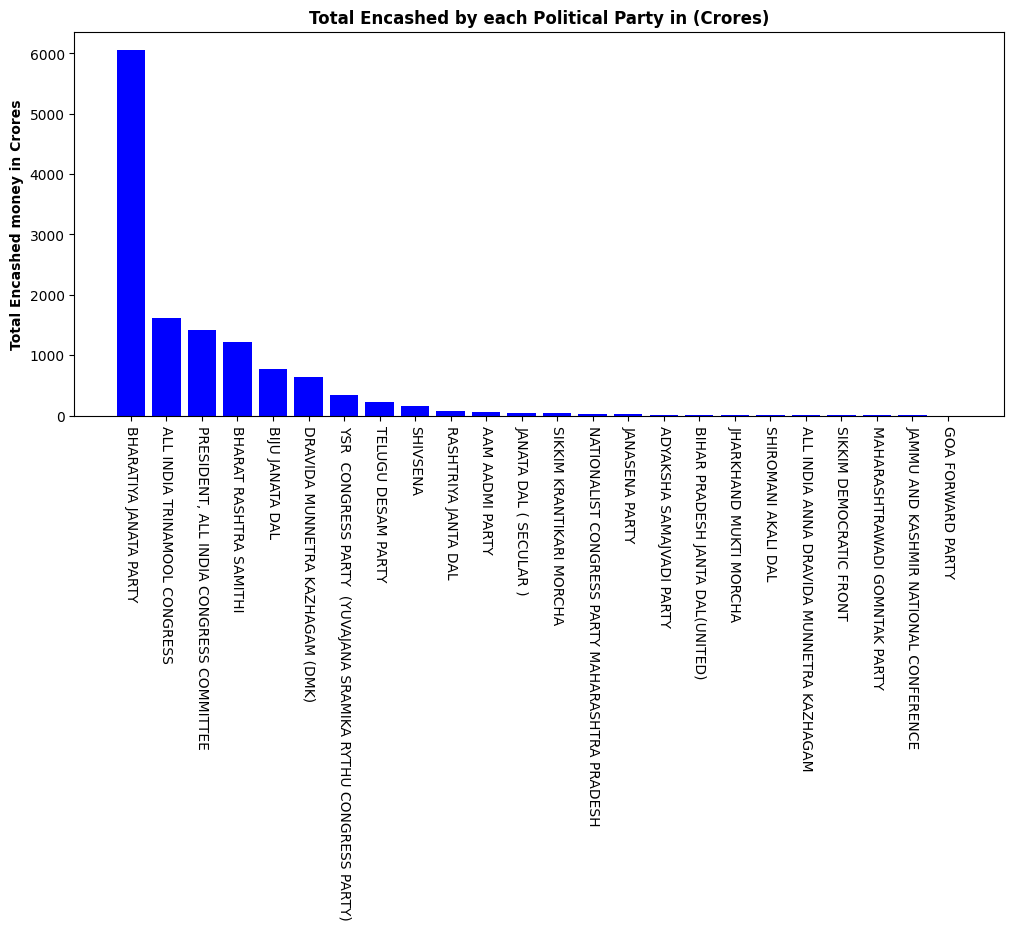

In [73]:
pandas_df = Total_encashment_political_party.toPandas()

plt.figure(figsize=(12, 8))
plt.title("Total Encashed by each Political Party in (Crores)", fontweight='bold')
plt.bar(pandas_df["Name_of_the_Political_Party"], pandas_df["encashement_by_pp_in_crores"], color="blue")
plt.ylabel("Total Encashed money in Crores", fontweight="bold")
plt.xticks(rotation=-90)
plt.savefig("images/Total_Encashed_Money_in_Crores.png")
plt.subplots_adjust(bottom=.4) 
plt.show()

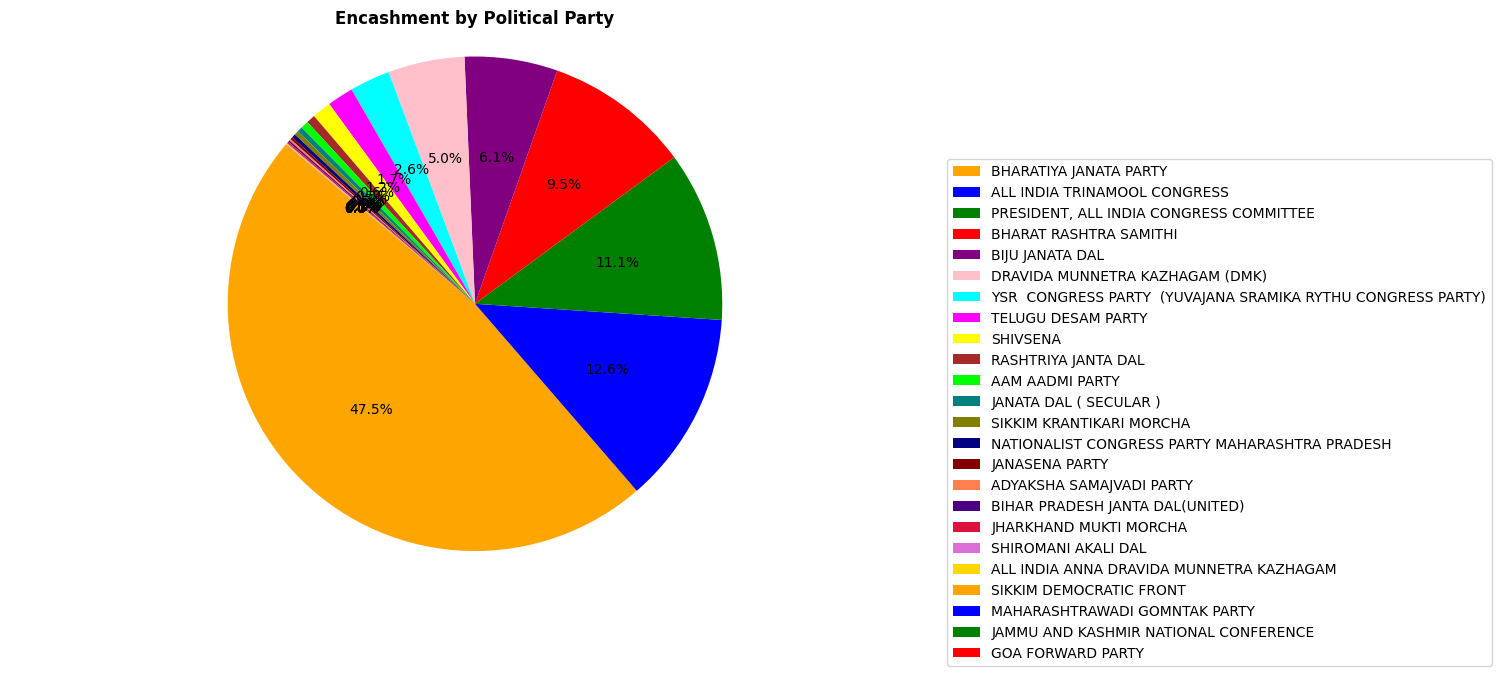

In [105]:

custom_colors = ['orange', 'blue', 'green', 'red', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown',
                 'lime', 'teal', 'olive', 'navy', 'maroon', 'coral', 'indigo', 'crimson', 'orchid', 'gold']

# custom_colors = plt.cm.tab20.colors

plt.figure(figsize=(12, 8))
plt.title("Encashment by Political Party", fontweight='bold')
plt.pie(pandas_df["encashement_by_pp_in_crores"], labels=None, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.legend(pandas_df["Name_of_the_Political_Party"], loc='center left', bbox_to_anchor=(1, .3), fontsize=10)
plt.axis('equal')
plt.savefig("images/Encashment_by_Political_Party.png")
plt.subplots_adjust(bottom=.2) 
plt.show()

In [41]:
final_df = eb_purchase_df_req.join(eb_redemption_df_req, \
                                   ((eb_purchase_df_req["Bond_Number_pur"]==eb_redemption_df_req["Bond_Number_Buyer"]) &( eb_purchase_df_req["Prefix_pur"] ==eb_redemption_df_req["Prefix_Buyer_Bond"])), \
                                   how="left")
final_df.show(truncate=False)

+---------------+----------+----------------------------------------------+-----------------+----------------+--------------+-----------------------+-----------------+-----------------+------------------+-------------------+----------------------------+---------------+
|Bond_Number_pur|Prefix_pur|Name_of_the_Purchaser                         |Denominations_pur|Date_of_Purchase|Date_of_Expiry|Ref_URN                |Bond_Number_Buyer|Prefix_Buyer_Bond|Date_of_Encashment|Denominations_By_PP|Name_of_the_Political_Party |Pay_Branch_Code|
+---------------+----------+----------------------------------------------+-----------------+----------------+--------------+-----------------------+-----------------+-----------------+------------------+-------------------+----------------------------+---------------+
|1111           |OL        |A B C INDIA LIMITED                           |100000           |12/Apr/2019     |26/Apr/2019   |00001201904120000001166|1111             |OL               |25/Ap

In [42]:
final_df.columns

['Bond_Number_pur',
 'Prefix_pur',
 'Name_of_the_Purchaser',
 'Denominations_pur',
 'Date_of_Purchase',
 'Date_of_Expiry',
 'Ref_URN',
 'Bond_Number_Buyer',
 'Prefix_Buyer_Bond',
 'Date_of_Encashment',
 'Denominations_By_PP',
 'Name_of_the_Political_Party',
 'Pay_Branch_Code']

In [43]:
cols=["Bond_number_pur", "Prefix_pur", "Name_of_the_Purchaser", \
      "Denominations_pur", "Date_of_Purchase", \
      # "Bond_Number_Buyer",\
      # "Prefix_Buyer_Bond", \
      "Date_of_Encashment", "Denominations_By_PP", \
      "Name_of_the_Political_Party"
     ]

In [44]:
e_bond_pur_buyer_df = final_df.select(cols)
e_bond_pur_buyer_df.show()

+---------------+----------+---------------------+-----------------+----------------+------------------+-------------------+---------------------------+
|Bond_number_pur|Prefix_pur|Name_of_the_Purchaser|Denominations_pur|Date_of_Purchase|Date_of_Encashment|Denominations_By_PP|Name_of_the_Political_Party|
+---------------+----------+---------------------+-----------------+----------------+------------------+-------------------+---------------------------+
|           1111|        OL|  A B C INDIA LIMITED|           100000|     12/Apr/2019|       25/Apr/2019|             100000|       BHARATIYA JANATA ...|
|           1110|        OL|  A B C INDIA LIMITED|           100000|     12/Apr/2019|       25/Apr/2019|             100000|       BHARATIYA JANATA ...|
|           1125|        OL| ACROPOLIS MAINTEN...|           100000|     12/Apr/2019|       22/Apr/2019|             100000|       ALL INDIA TRINAMO...|
|           1129|        OL| ACROPOLIS MAINTEN...|           100000|     12/Apr/20

In [45]:
e_bond_pur_buyer_df.printSchema()

root
 |-- Bond_number_pur: long (nullable = true)
 |-- Prefix_pur: string (nullable = true)
 |-- Name_of_the_Purchaser: string (nullable = true)
 |-- Denominations_pur: integer (nullable = true)
 |-- Date_of_Purchase: string (nullable = true)
 |-- Date_of_Encashment: string (nullable = true)
 |-- Denominations_By_PP: integer (nullable = true)
 |-- Name_of_the_Political_Party: string (nullable = true)



In [46]:
e_bond_pur_buyer_df = e_bond_pur_buyer_df.withColumn("Denominations_pur", F.regexp_replace(F.col("Denominations_pur"),",", "").cast('int'))\
                        .withColumn("Denominations_By_PP", F.regexp_replace(F.col("Denominations_By_PP"), ",", "").cast("int"))\
                        .withColumn("Date_of_Purchase", F.to_date(F.col("Date_of_Purchase"), "dd/MMM/yyyy"))\
                        .withColumn("Date_of_Encashment", F.to_date(F.col("Date_of_Encashment"), "dd/MMM/yyyy"))

In [47]:
e_bond_pur_buyer_df.orderBy(F.col("Date_of_Purchase").asc()).show()


+---------------+----------+---------------------+-----------------+----------------+------------------+-------------------+---------------------------+
|Bond_number_pur|Prefix_pur|Name_of_the_Purchaser|Denominations_pur|Date_of_Purchase|Date_of_Encashment|Denominations_By_PP|Name_of_the_Political_Party|
+---------------+----------+---------------------+-----------------+----------------+------------------+-------------------+---------------------------+
|          23643|        OL| PONUGOTI HEMENDAR...|           100000|      2019-04-12|        2019-04-18|             100000|       PRESIDENT, ALL IN...|
|           6257|        OC| ESSEL MINING AND ...|         10000000|      2019-04-12|        2019-04-20|           10000000|       BHARATIYA JANATA ...|
|           6291|        OC| ESSEL MINING AND ...|         10000000|      2019-04-12|        2019-04-20|           10000000|       BHARATIYA JANATA ...|
|          11449|        TL| MERLIN RECREATION...|          1000000|      2019-04-

In [48]:
e_bond_pur_buyer_df.orderBy(F.col("Date_of_Encashment").desc()).show()


+---------------+----------+---------------------+-----------------+----------------+------------------+-------------------+---------------------------+
|Bond_number_pur|Prefix_pur|Name_of_the_Purchaser|Denominations_pur|Date_of_Purchase|Date_of_Encashment|Denominations_By_PP|Name_of_the_Political_Party|
+---------------+----------+---------------------+-----------------+----------------+------------------+-------------------+---------------------------+
|           2637|        TL| VALLURUPALLI PRAB...|          1000000|      2024-01-10|        2024-01-24|            1000000|             JANASENA PARTY|
|          17437|        OC| INDERDEEP CONSTRU...|         10000000|      2024-01-11|        2024-01-24|           10000000|       BHARATIYA JANATA ...|
|           2619|        TL| VALLURUPALLI PRAB...|          1000000|      2024-01-10|        2024-01-24|            1000000|             JANASENA PARTY|
|          17435|        OC| INDERDEEP CONSTRU...|         10000000|      2024-01-

**The detals where starting date for purchase Electoral Bond, ending of date of purchasing Electoral Bond as well as the starding date of encashment and ending of encashment of Electoral Bond**

In [49]:
e_bond_pur_buyer_df.agg(F.min(F.col("Date_of_Purchase")).alias("Start date of purchase"),\
                        F.max(F.col("Date_of_Purchase")).alias("End date of purchase"),\
                        F.min(F.col("Date_of_Encashment")).alias("Start date of Encashment"),\
                        F.max(F.col("Date_of_Encashment")).alias("end date of Encashment"),\
                        F.count(F.col("Bond_number_pur")).alias("Total no. of Purchased Bonds"),\
                        F.count(F.col("Denominations_By_PP")).alias("Total no. of encashed/PP")).show(truncate=False)


+----------------------+--------------------+------------------------+----------------------+----------------------------+------------------------+
|Start date of purchase|End date of purchase|Start date of Encashment|end date of Encashment|Total no. of Purchased Bonds|Total no. of encashed/PP|
+----------------------+--------------------+------------------------+----------------------+----------------------------+------------------------+
|2019-04-12            |2024-01-11          |2019-04-16              |2024-01-24            |18871                       |18741                   |
+----------------------+--------------------+------------------------+----------------------+----------------------------+------------------------+



In [53]:
total_bonds_pur = e_bond_pur_buyer_df.groupBy("Name_of_the_Purchaser")\
                                    .agg(F.count(F.col("Denominations_pur")).alias("Total_bonds_purchase"))

total_bonds_pur.orderBy(F.col("Total_bonds_purchase").desc()).show(truncate=False)

+----------------------------------------------+--------------------+
|Name_of_the_Purchaser                         |Total_bonds_purchase|
+----------------------------------------------+--------------------+
|FUTURE GAMING AND HOTEL SERVICES PR           |1208                |
|MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED|821                 |
|QWIKSUPPLYCHAINPRIVATELIMITED                 |410                 |
|HALDIA ENERGY LIMITED                         |395                 |
|VEDANTA LIMITED                               |386                 |
|ESSEL MINING AND INDS LTD                     |238                 |
|MKJ ENTERPRISES LIMITED                       |235                 |
|TRANSWAYS EXIM PRIVATE LIMITED                |226                 |
|WESTERN UP POWER TRANSMISSION COMPANY LI MITED|220                 |
|KEVENTER FOODPARK INFRA LIMITED               |204                 |
|MADANLAL LTD.                                 |199                 |
|BHARTI AIRTEL LIMIT

In [54]:
e_bond_pur_buyer_df.groupBy("Name_of_the_Purchaser")\
                                    .agg((F.sum(F.col("Denominations_pur")/10**7)).alias("Total_bond_worth"))\
                                    .orderBy(F.col("Total_bond_worth").desc()).show(truncate=False)



+----------------------------------------------+------------------+
|Name_of_the_Purchaser                         |Total_bond_worth  |
+----------------------------------------------+------------------+
|FUTURE GAMING AND HOTEL SERVICES PR           |1208.0            |
|MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED|821.0             |
|QWIKSUPPLYCHAINPRIVATELIMITED                 |410.0             |
|HALDIA ENERGY LIMITED                         |377.0             |
|VEDANTA LIMITED                               |375.65            |
|ESSEL MINING AND INDS LTD                     |224.49999999999994|
|WESTERN UP POWER TRANSMISSION COMPANY LI MITED|220.0             |
|KEVENTER FOODPARK INFRA LIMITED               |194.99999999999994|
|MADANLAL LTD.                                 |185.49999999999994|
|BHARTI AIRTEL LIMITED                         |183.0             |
|YASHODA SUPER SPECIALITY HOSPITAL             |162.0             |
|UTKAL ALUMINA INTERNATIONAL LIMITED           |

In [52]:
# total_bonds_per_company.withColumn("Total_bond_worth", F.col("Total_bond_worth")/10**7).show(truncate=False)

## Which Company donated to which Political Party

In [55]:
total_bonds_pur = e_bond_pur_buyer_df.groupBy("Name_of_the_Purchaser", "Name_of_the_Political_Party")\
                                    .agg((F.sum(F.col("Denominations_pur"))/10**7).alias("Total_bond_worth_in_Cr"))

total_bonds_pur.orderBy(F.col("Total_bond_worth_in_Cr").desc()).show(truncate=False)

+----------------------------------------------+------------------------------------------------------------+----------------------+
|Name_of_the_Purchaser                         |Name_of_the_Political_Party                                 |Total_bond_worth_in_Cr|
+----------------------------------------------+------------------------------------------------------------+----------------------+
|MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED|BHARATIYA JANATA PARTY                                      |519.0                 |
|FUTURE GAMING AND HOTEL SERVICES PR           |DRAVIDA MUNNETRA KAZHAGAM (DMK)                             |453.0                 |
|FUTURE GAMING AND HOTEL SERVICES PR           |ALL INDIA TRINAMOOL CONGRESS                                |435.0                 |
|QWIKSUPPLYCHAINPRIVATELIMITED                 |BHARATIYA JANATA PARTY                                      |375.0                 |
|HALDIA ENERGY LIMITED                         |ALL INDIA TRINAMOOL C